In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

file_to_load = "student-mat.csv"

df_original = pd.read_csv(file_to_load)
df_original.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
colors=["#9AA0A8","#A7C4B5","#0B4F6C","#AF1B3F",'#1F271B']
sns.set_palette(sns.color_palette(colors))

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df_parentEdu = df_original[['Medu', 'Fedu', 'G1', 'G2', 'G3']].copy()
df_parentEdu.head()

,Medu,Fedu,G1,G2,G3
0,4,4,5,6,6
1,1,1,5,5,6
2,1,1,7,8,10
3,4,2,15,14,15
4,3,3,6,10,10


In [5]:
df_finalGrademean = df_parentEdu["G3"].mean()

df_finalGrademean

10.415189873417722

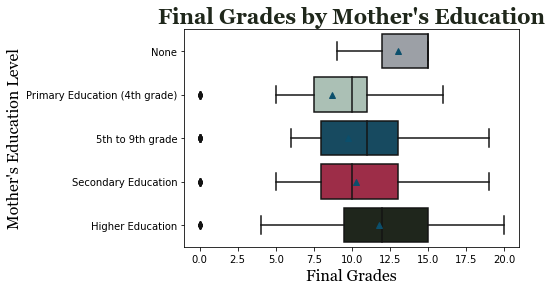

In [6]:
sns.boxplot(x='G3', y='Medu', data=df_parentEdu, orient="h", palette=colors, showmeans=True)
plt.yticks([0, 1, 2, 3, 4], ['None', 'Primary Education (4th grade)', '5th to 9th grade', 'Secondary Education', 'Higher Education'])
plt.title("Final Grades by Mother's Education", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Final Grades", fontsize=16,fontname="Georgia")
plt.ylabel("Mother's Education Level", fontsize=16,fontname="Georgia")
plt.show()



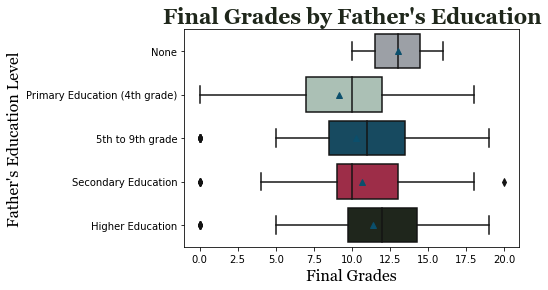

In [7]:
sns.boxplot(x='G3', y='Fedu', data=df_parentEdu, orient="h", palette=colors, showmeans=True)
plt.yticks([0, 1, 2, 3, 4], ['None', 'Primary Education (4th grade)', '5th to 9th grade', 'Secondary Education', 'Higher Education'])
plt.title("Final Grades by Father's Education", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Final Grades", fontsize=16,fontname="Georgia")
plt.ylabel("Father's Education Level", fontsize=16,fontname="Georgia")
plt.show()


In [37]:
df_reason = df_original[['G3', 'Walc','Dalc','reason','sex']].copy()
df_reason = df_reason.rename(columns={"G3": "Final Grade", "Walc": "Wkd Consumption", "Dalc": "Daily Consumption"})

df_reason.head()

,Final Grade,Wkd Consumption,Daily Consumption,reason,sex
0,6,1,1,course,F
1,6,1,1,course,F
2,10,3,2,other,F
3,15,1,1,home,F
4,10,2,1,home,F


C:\Users\kelse\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


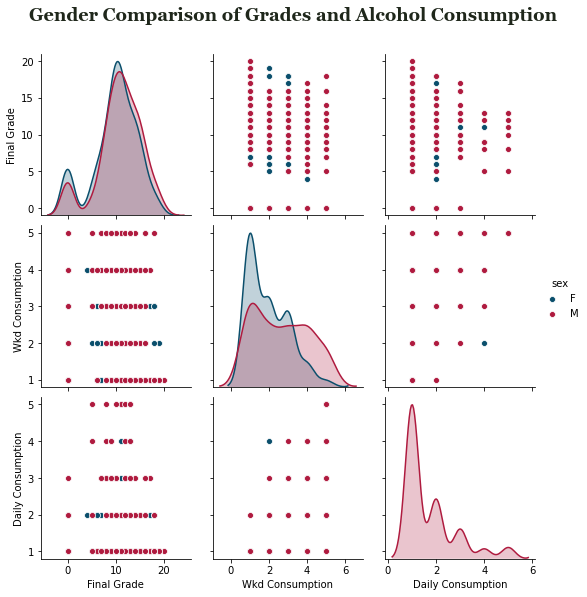

In [40]:
p= sns.pairplot(df_reason, hue="sex", kind="scatter", palette=["#0B4F6C","#AF1B3F"])
p.fig.suptitle("Gender Comparison of Grades and Alcohol Consumption", y=1.08, fontsize=18,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.show()
